# 20 뉴스 그룹 토픽모델링
- 주제 3개만사용

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats = ['comp.graphics', 'soc.religion.christian','rec.sport.baseball']

In [ ]:
news_df = fetch_20newsgroups(
    subset='all', # train+ test 다가져와라
    remove=('headers', 'footers', 'quotes'), # 뉴스기사니까 머리말, 꼬리말, 인용구 제거하고 가져와라
    categories=cats,
    random_state=42
)

news_df

{'data': ["Hi all,\n\n\tI got tired of waiting for a mailing list so I am going to make one....\njust send me your complete e-mail address on your message and I'll send\nyou a confirmation and the Yankee mailing list address\n\n-john",
  "\nDominik,\n\n\tHave you tried xgrasp?  It's out there on several ftp sites.(not sure which, but archie can find it, I'm sure.)  It works ok but it lacks an interface.",
  'There was an article on Jewish major leaguers in a recent issue of "Elysian \nFields", what used to be the "Minnesota Review of Baseball".  As I recall, \nit had an amazing amount of research, with a long list of players and a \nlarge bibliography.',
  '  \n\n',
  "\n\n\n\tWarren, I agree with your premise... but... The Babe won on\ntwo teams. That's right, he was part of the Red Sox Dynasty of the\n1910s. And everyone knows that the Yankee Dynsaty wouldn't have\nhappened without thier famous bullpen catcher whose name escapes me at\nthe moment.",
  '\n\n\n\nI opened the file with 

In [ ]:
# preprocessing.. 생략...
# lemma, stopwords, 특수기호 제거...

In [ ]:
# LDA는 기본적으로 DTM기반을 사용
# LDA : 문서별 토픽, 토픽별 단어분포를 찾아줌
# tfidf말고 countvectorizer사용할거
count_vectorizer = CountVectorizer(
    max_df=0.95,           # 문서에서 등장하는 최대 비율(실수) 또는 빈도수(정수)(DF)
    max_features=1000,     # 단어를 몇 개 사용할지 설정
    min_df=2,              # 문서에서 등장하는 최소 비율(실수) 또는 빈도수(정수)(DF) utlier제거에 사용
    stop_words='english',  # preprocessing에서 이미했으면 안해도됨
    ngram_range=(1,2)      # ngram설정 (최소단어개수, 최대단어개수) unigram과 bigram을 쓸거다. 한개만쓸꺼면(1,1)
    )


max_df

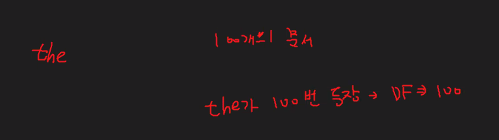

- the가 100이지만 95만쓰겠다.
- at이 94번나왔다? > 사용

In [ ]:
# DTM생성
dtm_vector = count_vectorizer.fit_transform(news_df['data'])
dtm_vector.shape
# 2964개의 문장 1000개의 단어

(2964, 1000)

In [ ]:
# 단어 확인 (feature 확인) 1000개
count_vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '00 00',
 '000',
 '01',
 '02',
 '03',
 '03 03',
 '04',
 '05',
 '06',
 '07',
 '10',
 '100',
 '11',
 '12',
 '128',
 '13',
 '130',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1988',
 '1992',
 '1993',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '24 bit',
 '25',
 '256',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '33',
 '333',
 '35',
 '3d',
 '40',
 '44',
 '50',
 '500',
 '60',
 '75',
 '80',
 '90',
 '91',
 '92',
 '93',
 'aaron',
 'ab',
 'ability',
 'able',
 'absolute',
 'ac',
 'accept',
 'access',
 'according',
 'account',
 'act',
 'action',
 'acts',
 'actually',
 'add',
 'address',
 'advance',
 'age',
 'ago',
 'agree',
 'al',
 'algorithm',
 'allow',
 'allows',
 'alomar',
 'alt',
 'american',
 'amiga',
 'analysis',
 'angels',
 'animation',
 'anonymous',
 'anonymous ftp',
 'answer',
 'answers',
 'anybody',
 'appear',
 'appears',
 'application',
 'applications',
 'apply',
 'appreciated',
 'approach',
 'appropriate',
 'april',
 'archie',
 'archive',
 'area',
 'aren',
 'argu

# LDA 적용

In [ ]:
lda = LatentDirichletAllocation(
    n_components = len(cats), # 주제 3개만쓰기로했으므로, n_components = 생성할 토픽의개수
    random_state=42           # 초기토픽부여를 랜덤하게하는걸 고정

)

lda.fit(dtm_vector) # dtm된걸 집어넣기

LatentDirichletAllocation(n_components=3, random_state=42)

LDA 이과정 반복

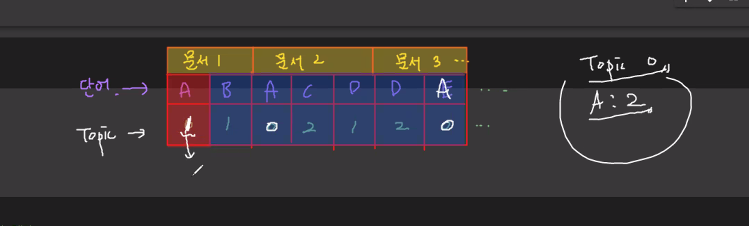

토픽0 에 A가 2개있네? 눈치껏 0번으로 옮겨

# 토픽(주제) 별 단어 연관도 확인
- 토픽에 포함되는 단어의 연관도 확인
  - 연관도는 횟수를 의미
  - 등장횟수를 정규화
  

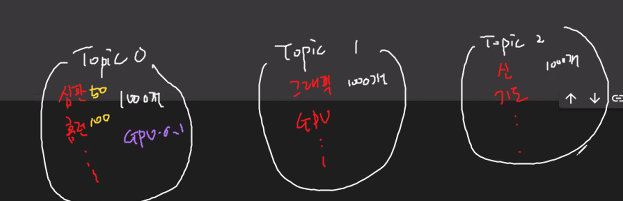

3 X 1000 형태로되어있어

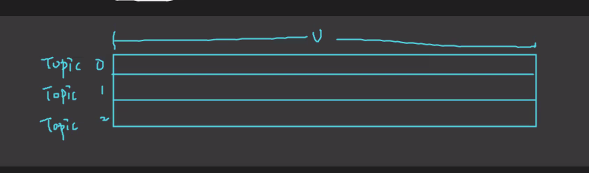

In [ ]:
# 3개의 토픽에 대한 단어들의 점수
lda.components_.shape

(3, 1000)

In [ ]:
lda.components_

array([[ 63.63332482,   0.34963495,  17.44704079, ...,  16.61505824,
          2.5384632 , 122.4210569 ],
       [208.02174752,  68.31556307,  90.89958785, ...,  80.29277085,
         54.27731685,   3.2448167 ],
       [  0.34492766,   0.33480198,   0.65337136, ...,   2.09217091,
         49.18421995,   0.3341264 ]])

In [ ]:
# 각 토픽 별 중심 단어확인
# 중심단어 = 점수가 높은 단어!

for topic_index, topic_score in enumerate(lda.components_):
  print("Topic # {}번".format(topic_index))

  # 단어의 인덱스 구하기. 점수가 높은 순서대로 구하기
  
  topic_word_indexes = topic_score.argsort()[::-1] # 내림차순으로 원래 인덱스배열!
  top_indexes = topic_word_indexes[:10]

  feature_names = count_vectorizer.get_feature_names_out()  #_out붙이면 warning안뜸 _out붙이면 최신꺼! 앞으로 없어지니까 이거쓰세요 warning이었음

  top_features = [str(feature_names[i]) for i in top_indexes]
  print(top_features)
  print()

Topic # 0번
['image', 'graphics', 'jpeg', 'edu', 'file', 'images', 'data', 'available', 'software', 'use']

Topic # 1번
['year', 'game', 'don', 'think', 'good', 'team', 'time', 'games', 'just', 'like']

Topic # 2번
['god', 'people', 'jesus', 'church', 'think', 'know', 'does', 'just', 'christ', 'don']



# argsort()
- 원래 인덱스를 그대로 간직
- 0213이됨

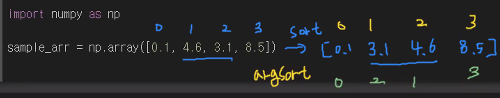

In [ ]:
import numpy as np

sample_arr = np.array([0.1, 4.6 , 3.1, 8.5])
sample_arr.argsort()[::-1] # 뒤집어서가져오기 [::-1]

array([3, 1, 2, 0])

이렇게사용할거 abc는단어

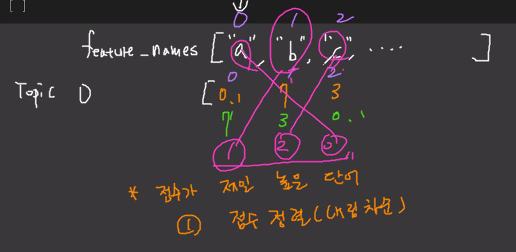

# 각 문서별 토픽 분포 확인

In [ ]:
doc_topics = lda.transform(dtm_vector) # dtm_vector는 2964 X 1000
doc_topics.shape
# 문서의개수 X 토픽(주제)개수 3개

(2964, 3)

In [ ]:
doc_topics[:3]
# 0번 문서는 85%로 0번토픽이다.
# 1번문서는 90%로 0번토픽이다.

array([[0.85839148, 0.12070316, 0.02090536],
       [0.90436513, 0.05643273, 0.03920214],
       [0.22961015, 0.5236614 , 0.24672845]])

In [ ]:
# 파일이름 가져오기
def get_filename_list(newsdata):
    filename_list=[]

    for file in newsdata.filenames:
            #print(file)
            filename_temp = file.split('\\')[-2:]
            filename = '.'.join(filename_temp)
            filename_list.append('/'.join(filename.split('/')[-2:]))
    
    return filename_list

filename_list = get_filename_list(news_df)
print("filename 개수:",len(filename_list), "filename list 10개만:",filename_list[:10])

filename 개수: 2964 filename list 10개만: ['rec.sport.baseball/105154', 'comp.graphics/38805', 'rec.sport.baseball/104616', 'comp.graphics/37928', 'rec.sport.baseball/104823', 'comp.graphics/38908', 'comp.graphics/38659', 'comp.graphics/38691', 'comp.graphics/38876', 'comp.graphics/38700']


In [ ]:
import pandas as pd
topic_names = ["topic # {}".format(i) for i in range(0, len(cats))]
topic_names

['topic # 0', 'topic # 1', 'topic # 2']

In [ ]:
topic_df = pd.DataFrame(
    doc_topics, # 2964 * 3 문서별 토픽분포
    columns=topic_names,
    index=filename_list
)

topic_df

,topic # 0,topic # 1,topic # 2
rec.sport.baseball/105154,0.858391,0.120703,0.020905
comp.graphics/38805,0.904365,0.056433,0.039202
rec.sport.baseball/104616,0.229610,0.523661,0.246728
comp.graphics/37928,0.333333,0.333333,0.333333
rec.sport.baseball/104823,0.028380,0.940660,0.030959
...,...,...,...
comp.graphics/38311,0.424100,0.416729,0.159172
comp.graphics/38435,0.333333,0.333333,0.333333
soc.religion.christian/20894,0.003928,0.004123,0.991949
comp.graphics/38275,0.922023,0.036687,0.041290


In [ ]:
print(news_df['data'][1])


Dominik,

	Have you tried xgrasp?  It's out there on several ftp sites.(not sure which, but archie can find it, I'm sure.)  It works ok but it lacks an interface.


In [ ]:
# 테스트해보장
# 토픽1야구 2종교가 섞여있지않을까?
test = "I prayed to God to win this game. God answered, and we could win this game."
test_vector = count_vectorizer.transform([test]) # test용이니까 fit안함
lda.transform(test_vector)

array([[0.04767431, 0.61900264, 0.33332305]])

# 토픽 모델링 시각화
- 개신기하당

In [ ]:
!pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

# 노트북에서 사용가능하도록 설정
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.sklearn.prepare(lda, dtm_vector, count_vectorizer) # 다시학습해서 1번이 종교가된듯

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.104368  0.149782       1        1  42.598546
0     -0.229945 -0.008935       2        1  36.607569
1      0.125577 -0.140847       3        1  20.793885, topic_info=         Term         Freq        Total Category  logprob  loglift
384       god  1902.000000  1902.000000  Default  30.0000  30.0000
445     image  1167.000000  1167.000000  Default  29.0000  29.0000
394  graphics   866.000000   866.000000  Default  28.0000  28.0000
994      year   594.000000   594.000000  Default  27.0000  27.0000
482      jpeg   791.000000   791.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
510      like   281.310026  1067.459669   Topic3  -4.7112   0.2369
995     years   191.994209   368.794266   Topic3  -5.0932   0.9177
768       run   157.474646   274.735600   Topic3  -5.2914   1.0140
490      know   191.785593  1027.063634   Topic3  -5.0943  -0.1076
520        ll   157.029195   370.118187   Topic3  -5.2942   0.7131

[195 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.233803     00
0         3  0.764500     00
1         3  0.996253  00 00
3         2  0.007488     01
3         3  0.988417     01
...     ...       ...    ...
994       1  0.052134   year
994       3  0.946812   year
995       1  0.439269  years
995       2  0.037962  years
995       3  0.520615  years

[268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])